In [1]:
# import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range= 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/train',
    target_size =(150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/test',
    target_size = (150,150),
    batch_size = batch_size,
    class_mode = 'binary'
)

Found 1634 images belonging to 2 classes.
Found 1594 images belonging to 2 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization

In [4]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2),strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64,activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 148, 148, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 72, 72, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 34, 34, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,837,569 (18.45 MB)

 Trainable params: 4,837,121 (18.45 MB)

 Non-trainable params: 448 (1.75 KB)

In [5]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [9]:
history = model.fit(train_generator,steps_per_epoch = 1634//batch_size,epochs = 10, validation_data = validation_generator,validation_steps = 1594//batch_size)

Epoch 1/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 101s 986ms/step - accuracy: 0.5549 - loss: 0.7710 - val_accuracy: 0.5581 - val_loss: 0.7468
Epoch 2/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5000 - loss: 0.6748 - val_accuracy: 0.5000 - val_loss: 0.9575
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 61s 203ms/step - accuracy: 0.5883 - loss: 0.6719 - val_accuracy: 0.6850 - val_loss: 0.6358
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step - accuracy: 0.5625 - loss: 0.7474 - val_accuracy: 0.7000 - val_loss: 0.7067
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 21s 199ms/step - accuracy: 0.5896 - loss: 0.6682 - val_accuracy: 0.5915 - val_loss: 0.6886
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.7500 - loss: 0.5591 - val_accuracy: 0.5000 - val_loss: 0.9184
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 202ms/step - accuracy: 0.6074 - loss: 0.6380 - val_accuracy: 0.6294 - val_loss: 0.6852
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.6250 - loss: 0.535

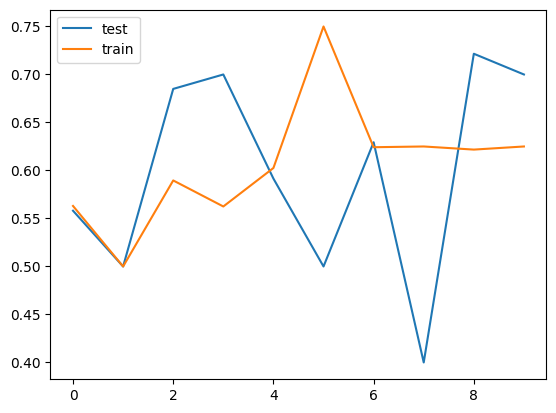

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'],label = 'test')
plt.plot(history.history['accuracy'],label = 'train')
plt.legend()
plt.show()